In [43]:
result_folder = "first_results_70"

In [44]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

In [45]:
with open(os.path.join("results", result_folder, "loss_history.json"), 'r') as f:
    loss_history = json.load(f)
    
with open(os.path.join("results", result_folder, "predictions.json"), 'r') as f:
    predictions = json.load(f)

Text(0.5, 1.0, 'Training Loss')

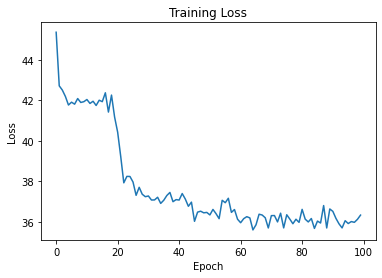

In [46]:
losses = [np.mean(loss_history[e]) for e in loss_history]
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

In [50]:
scores = predictions["predictions"]
labels = predictions["labels"]
font_pairs = predictions["font_pairs"]
label_to_font = {v:k for k,v in predictions["font_to_label"].items()}

In [51]:
fonts = set(np.array(font_pairs).flatten())
font_to_roc_curve = {}
for font in fonts:
    y_true, y_score = [], []
    for score, label, font_pair in zip(scores, labels, font_pairs):
        if font in font_pair:
            y_true.append(int(label))
            y_score.append(score)
            
    font_to_roc_curve[font] = roc_curve(y_true, y_score)
    

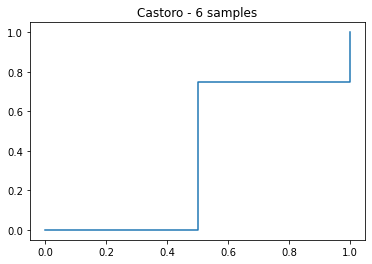

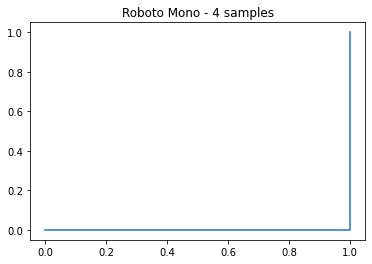

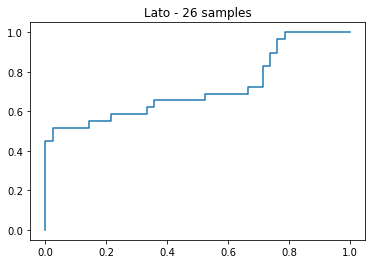

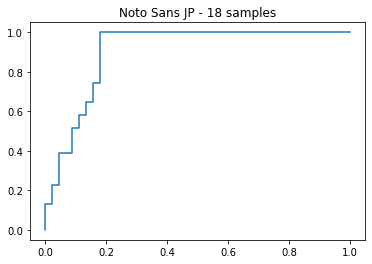

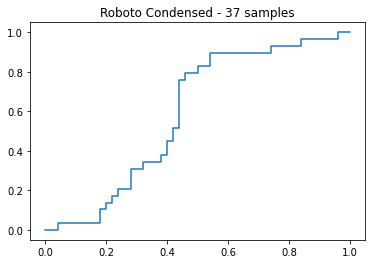

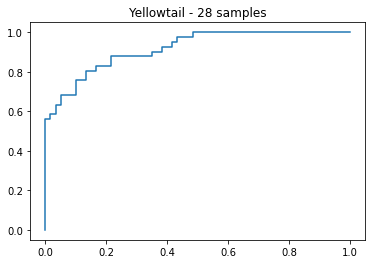

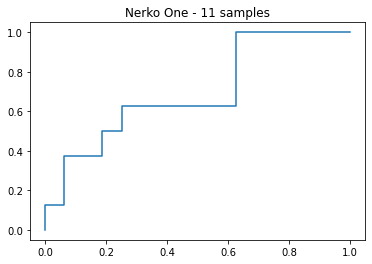

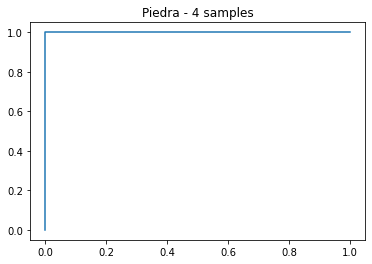

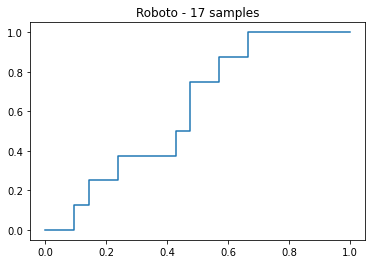

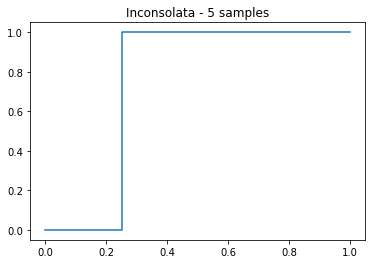

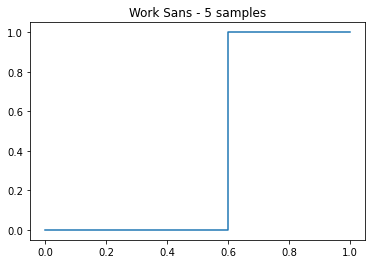

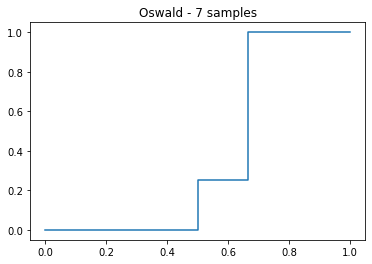

In [53]:
for font in fonts:
    fpr,tpr,_ = font_to_roc_curve[font]
    plt.plot(fpr,tpr)
    plt.title(f"{label_to_font[font]} - {len(fpr)} samples")
    plt.show()